In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from pydub import AudioSegment

# Read off phonems

In [2]:
wav_path = '/Users/tomasandrade/Documents/BSC/ICHOIR/ls_features/LABELED_FULL/ES_volver_a_los_17.wav'
lab_path = '/Users/tomasandrade/Documents/BSC/ICHOIR/ls_features/LABELED_FULL/ES_volver_a_los_17.lab'

In [3]:
df = pd.read_csv(lab_path, delim_whitespace=True, header=None, names=["start", "end", "label"])

df[['start', 'end']] = df[['start', 'end']]/1e4
df['duration'] = df['end'] - df['start'] 

In [4]:
df

,start,end,label,duration
0,0.0000,586.8481,SP,586.8481
1,586.8481,627.6644,b,40.8163
2,627.6644,705.6690,o,78.0046
3,705.6690,819.0476,l,113.3786
4,819.0476,856.2419,B,37.1943
...,...,...,...,...
1603,222300.2368,222562.3552,e,262.1184
1604,222562.3552,222653.0560,D,90.7008
1605,222653.0560,222695.6800,r,42.6240
1606,222695.6800,223896.6016,a,1200.9216


In [9]:
#df[(df['duration'] > 40) & (df['duration'] < 80)].sort_values(by = 'duration')

In [6]:
df_a = df[(df['label'] == 'a') & ((df['duration']> 200) & (df['duration'] < 600))]

<Axes: >

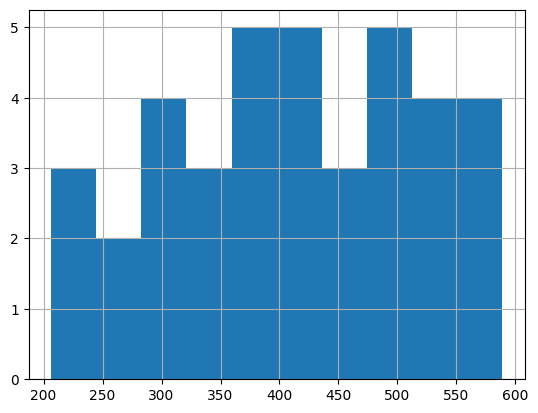

In [8]:
df_a['duration'].hist()

In [15]:
df['label'].unique()

array(['SP', 'b', 'o', 'l', 'B', 'e', 'r', 'a', 's', 'd', 'y', 'z', 'i',
       't', 'h', 'AP', 'p', 'w', 'u', 'n', 'x', 'k', 'm', 'D', 'f', 'g',
       'rr', 'N', 'Y', 'll', 'cl', 'ch', 'G'], dtype=object)

In [ ]:
audio = AudioSegment.from_wav(wav_path)

In [27]:
ph = 'l'
df_phone = df[df['label'] == ph]

In [28]:
out_folder = f'/Users/tomasandrade/Documents/BSC/ICHOIR/espacio-latente-maria-main/phonems/{ph}/wavs'

In [29]:
def slice_audios_from_df(df, out_folder):
    os.makedirs(out_folder)
    for idx, row in df.iterrows():
        start_ms = row['start']    
        end_ms = row['end']
        label = row['label']        # optional: use for naming

        # Slice the audio
        clip = audio[start_ms:end_ms]

        # Create a filename for the clip
        filename = f"clip_{label}_{idx}.wav"

        # Export the clip
        clip.export(f'{out_folder}/{filename}', format="wav")
        print(f"Exported: {filename}") 

In [30]:
slice_audios_from_df(df_phone, out_folder)

Exported: clip_l_3.wav
Exported: clip_l_8.wav
Exported: clip_l_41.wav
Exported: clip_l_90.wav
Exported: clip_l_97.wav
Exported: clip_l_116.wav
Exported: clip_l_132.wav
Exported: clip_l_175.wav
Exported: clip_l_176.wav
Exported: clip_l_241.wav
Exported: clip_l_246.wav
Exported: clip_l_279.wav
Exported: clip_l_287.wav
Exported: clip_l_301.wav
Exported: clip_l_310.wav
Exported: clip_l_350.wav
Exported: clip_l_369.wav
Exported: clip_l_376.wav
Exported: clip_l_378.wav
Exported: clip_l_413.wav
Exported: clip_l_448.wav
Exported: clip_l_456.wav
Exported: clip_l_483.wav
Exported: clip_l_515.wav
Exported: clip_l_525.wav
Exported: clip_l_573.wav
Exported: clip_l_578.wav
Exported: clip_l_611.wav
Exported: clip_l_619.wav
Exported: clip_l_633.wav
Exported: clip_l_642.wav
Exported: clip_l_658.wav
Exported: clip_l_665.wav
Exported: clip_l_681.wav
Exported: clip_l_689.wav
Exported: clip_l_699.wav
Exported: clip_l_704.wav
Exported: clip_l_720.wav
Exported: clip_l_744.wav
Exported: clip_l_751.wav
Exporte